# Hockey Reference to dataframe

Inspiration: https://github.com/jldbc/pybaseball

Sample table: https://www.hockey-reference.com/leagues/NHL_2019_standings.html

This notebook shows how to scrape data from [hockey reference](https://www.hockey-reference.com) and pull it into a `pandas` dataframe. This automates the task of loading a table, downloading as a CSV and copying it into a  notebook directory. The table used in this example contains team vs team records from hockey-reference for a given season. I use it to create a heatmap based on point totals (using standard NHL scoring) for each matchup. This is a bit of a toy example but I like that I can relatively easily get a tangible output from my scraping. Future additions could include using the heatmap in a dashboard to track matchups for a set of teams, and also building out the data scraping as a Python library that works for a variety of tables and sources (`pybaseball` library is my inspiration for this). 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_soup(year):
    url = f'https://www.hockey-reference.com/leagues/NHL_{year}_standings.html'
    s=requests.get(url).content
    return BeautifulSoup(s, "lxml")

def get_team_vs_team_table(season):
    soup = get_soup(season)
    datasets = []
    tables = soup.find_all('table')
    table = soup.find('table', id="team_vs_team")
    data = []
    headings = [th.get_text() for th in table.find("tr").find_all("th")]
    data.append(headings[1:]) # drop Rank
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)

    df = pd.DataFrame(data)
    return df

In [2]:
df = get_team_vs_team_table(2020)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.set_index('')
df

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,VEG,WPG,WSH
,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,,1-0-0,0-0-0,0-0-0,0-0-0,1-0-0,0-0-0,0-0-0,0-0-0,0-0-0,...,0-0-0,0-1-0,1-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0
Arizona Coyotes,0-1-0,,0-1-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-1,0-0-0,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,1-0-0,0-0-0,0-0-0
Boston Bruins,0-0-0,1-0-0,,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-1-0,1-0-0,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,1-0-0,0-0-0,0-0-0
Buffalo Sabres,0-0-0,0-0-0,0-0-0,,0-0-0,0-0-1,0-0-0,0-0-0,0-0-0,0-0-0,...,0-0-0,1-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0
Carolina Hurricanes,0-0-0,0-0-0,0-0-0,0-0-0,,0-1-0,0-0-0,0-0-0,0-0-0,0-0-0,...,0-0-0,0-0-0,0-0-0,0-0-0,1-0-0,0-0-0,0-0-0,0-0-0,0-0-0,1-0-0
Columbus Blue Jackets,0-1-0,0-0-0,0-0-0,1-0-0,1-0-0,,0-0-0,0-0-0,0-0-0,0-0-0,...,0-0-0,0-1-0,0-0-0,0-0-0,0-0-0,0-1-0,0-0-0,0-0-0,0-0-0,0-0-0
Calgary Flames,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,,0-0-0,0-1-0,1-0-0,...,0-0-0,0-0-0,0-1-0,0-0-0,0-0-0,0-0-0,1-0-0,0-1-0,0-0-0,0-0-0
Chicago Blackhawks,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,,0-0-0,0-0-0,...,0-1-0,0-0-0,0-1-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-1,0-0-0
Colorado Avalanche,0-0-0,1-0-0,1-0-0,0-0-0,0-0-0,0-0-0,1-0-0,0-0-0,,0-0-0,...,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0,0-0-0


In [3]:
def convert(v):
    """
    2 for win, 0 for lose, 1 for tie
    """
    if v == '':
        return 0
    else:
        return 2*int(v[0]) + 0*int(v[2]) + int(v[4])

In [4]:
for column in df:
    df[column] = df[column].apply(convert)
df

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,VEG,WPG,WSH
,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,0,2,0,0,0,2,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Arizona Coyotes,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
Boston Bruins,0,2,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,0,0
Buffalo Sabres,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Carolina Hurricanes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
Columbus Blue Jackets,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calgary Flames,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
Chicago Blackhawks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Colorado Avalanche,0,2,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


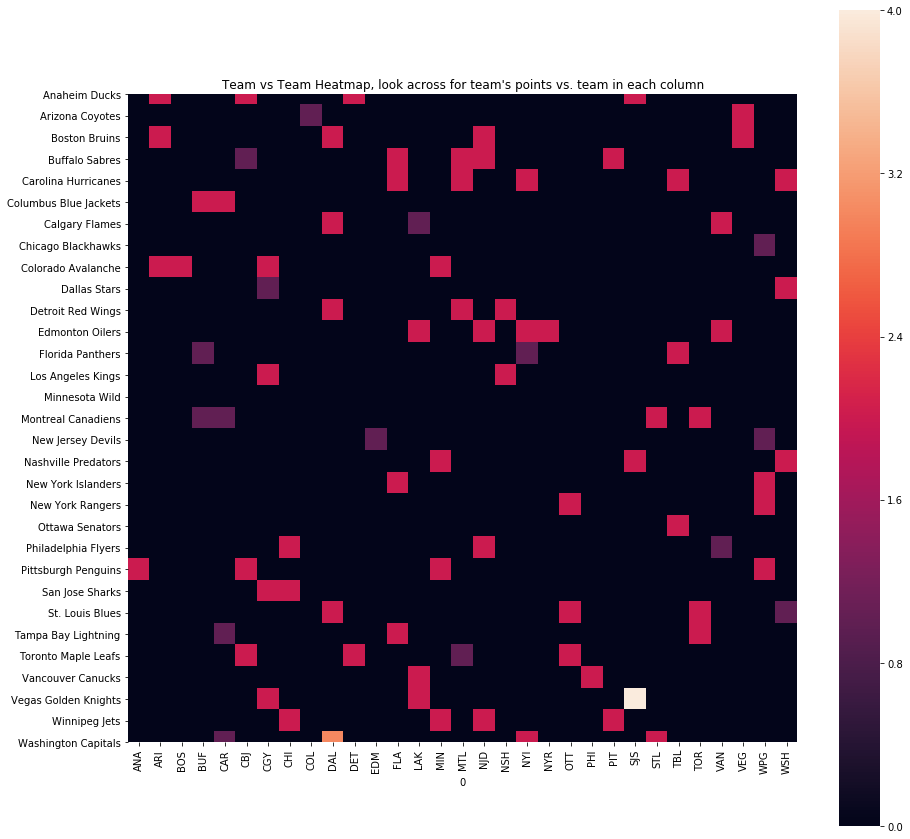

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.set_title("Team vs Team Heatmap, look across for team's points vs. team in each column")
sns.heatmap(df, square=True)
plt.show();